# tomatoraderのバックテスト結果の分析

tomatoraderでランダム戦略を複数の条件でそれぞれ30回実行した。

## 戦略

- ランダム仕掛け（p = 0.5 で買い仕掛け）
- 目標利益`X`で手仕舞い
- 最大保有期間は`N+1`

## 条件

- X：5〜50まで5刻み（10条件）
- N：5〜30まで5刻み（6条件）

これらの組み合わせで合計60条件

## 1条件のテスト

- E-MiniS&P500 Futures
- 日足データ
- 1997/9/11〜2020/5/29

仕掛けがランダムのため、このバックテストを30回行った。

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
import scipy.stats as st
import statsmodels.stats.anova as anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import datetime as dt
from dateutil.relativedelta import relativedelta
import locale
from joblib import Parallel, delayed

import finalib as fl
import finalib.mine as mi
import ta

# 月や曜日を英語で取得するためこの設定をしておく
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

'en_US.UTF-8'

In [12]:
# データ読み込み
df = pd.read_csv('data/backtest-result/random_entry_target_profit_exit_in_n_bars_200925.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pl           1800 non-null   float64
 1   n_trades     1800 non-null   int64  
 2   pp           1800 non-null   float64
 3   pl_avg       1800 non-null   float64
 4   sid          1800 non-null   int64  
 5   target_prof  1800 non-null   int64  
 6   n_bars       1800 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 98.6 KB


# 各条件での損益分布

Text(0.5, 1.0, 'Mean of PL in each condition')

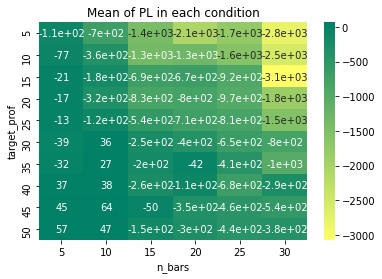

In [29]:
pl_means = df.groupby(['target_prof', 'n_bars'])['pl'].mean().unstack()

sns.heatmap(pl_means, annot=True, cmap='summer_r')
plt.title('Mean of PL in each condition')

Text(0.5, 1.0, 'Median of PL in each condition')

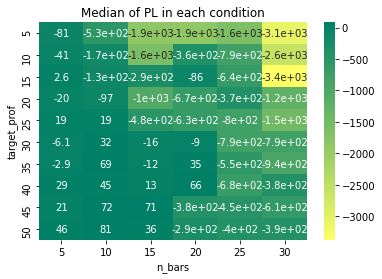

In [32]:
pl_medians = df.groupby(['target_prof', 'n_bars'])['pl'].median().unstack()

sns.heatmap(pl_medians, annot=True, cmap='summer_r')
plt.title('Median of PL in each condition')

Text(0.5, 1.0, 'Std of PL in each condition')

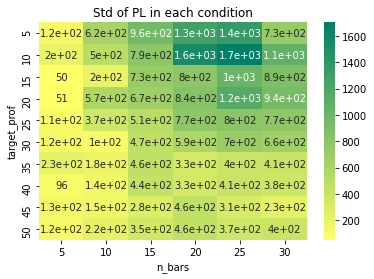

In [33]:
pl_stds = df.groupby(['target_prof', 'n_bars'])['pl'].std().unstack()

sns.heatmap(pl_stds, annot=True, cmap='summer_r')
plt.title('Std dev of PL in each condition')

Text(0.5, 1.0, 'Mean of PP in each condition')

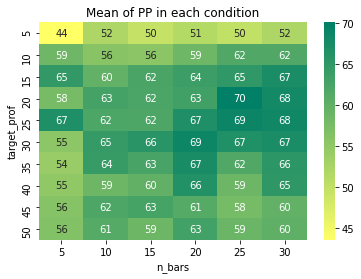

In [35]:
pl_stds = df.groupby(['target_prof', 'n_bars'])['pp'].mean().unstack()

sns.heatmap(pl_stds, annot=True, cmap='summer_r')
plt.title('Mean of PP in each condition')

In [37]:
sum([])

0